In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
from scipy.stats import rankdata

In [2]:
df = pd.read_csv('final_combined_dataset.csv')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel.y,freetime.y,goout.y,Dalc.y,Walc.y,health.y,absences.y,G1.y,G2.y,G3.y
0,0,0,15,0,0,1,1,1,0,2,...,3,1,2,1,1,1,4,13,13,13
1,0,0,15,0,0,1,1,1,2,2,...,3,3,4,2,4,5,2,13,11,11
2,0,0,15,0,0,1,2,2,0,2,...,4,3,1,1,1,2,8,14,13,12
3,0,0,15,0,0,1,2,4,3,1,...,4,3,2,1,1,5,2,10,11,10
4,0,0,15,0,0,1,3,3,3,3,...,4,2,1,2,3,3,2,13,13,13


In [4]:
df = df.rename(columns = {'Unnamed: 0':'ID'})

In [5]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.x',
       'traveltime.x', 'studytime.x', 'failures.x', 'schoolsup.x', 'famsup.x',
       'paid.x', 'activities.x', 'higher.x', 'romantic.x', 'famrel.x',
       'freetime.x', 'goout.x', 'Dalc.x', 'Walc.x', 'health.x', 'absences.x',
       'G1.x', 'G2.x', 'G3.x', 'guardian.y', 'traveltime.y', 'studytime.y',
       'failures.y', 'schoolsup.y', 'famsup.y', 'paid.y', 'activities.y',
       'higher.y', 'romantic.y', 'famrel.y', 'freetime.y', 'goout.y', 'Dalc.y',
       'Walc.y', 'health.y', 'absences.y', 'G1.y', 'G2.y', 'G3.y'],
      dtype='object')

In [6]:
xfeatures=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.x',
       'traveltime.x', 'studytime.x', 'failures.x', 'schoolsup.x', 'famsup.x',
       'paid.x', 'activities.x', 'higher.x', 'romantic.x', 'famrel.x',
       'freetime.x', 'goout.x', 'Dalc.x', 'Walc.x', 'health.x', 'absences.x','G1.x','G3.x']

In [7]:
yfeatures = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'nursery', 'internet','guardian.y', 'traveltime.y', 'studytime.y',
       'failures.y', 'schoolsup.y', 'famsup.y', 'paid.y', 'activities.y',
       'higher.y', 'romantic.y', 'famrel.y', 'freetime.y', 'goout.y', 'Dalc.y',
       'Walc.y', 'health.y', 'absences.y','G1.y','G3.y']

In [8]:
keepcol = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu',
       'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian.x',
       'traveltime.x', 'studytime.x', 'failures.x', 'schoolsup.x', 'famsup.x',
       'paid.x', 'activities.x', 'higher.x', 'romantic.x', 'famrel.x',
       'freetime.x', 'goout.x', 'Dalc.x', 'Walc.x', 'health.x', 'absences.x',
       'G1.x', 'G2.x', 'G3.x', 'guardian.y', 'traveltime.y', 'studytime.y',
       'failures.y', 'schoolsup.y', 'famsup.y', 'paid.y', 'activities.y',
       'higher.y', 'romantic.y', 'famrel.y', 'freetime.y', 'goout.y', 'Dalc.y',
       'Walc.y', 'health.y', 'absences.y', 'G1.y', 'G2.y', 'G3.y']

In [9]:
fildf = df.loc[:,keepcol]

In [10]:
fildf_x = fildf.loc[:,xfeatures]

In [11]:
fildf_y = fildf.loc[:,yfeatures]

In [12]:
fildf_x.shape

(882, 32)

In [13]:
fildf_y.shape

(882, 32)

In [14]:
def convertmarks(mark):
    if mark<10:
        return 'B'
    else:
        return 'A'

In [15]:
newlist=[]
for i in fildf_x['G1.x']:
    x = convertmarks(i)
    newlist.append(x)
fildf_x['New G1'] = newlist

In [16]:
newlist=[]
for i in fildf_y['G1.y']:
    x = convertmarks(i)
    newlist.append(x)
fildf_y['New G1'] = newlist

In [17]:
newlist=[]
for i in fildf_x['G3.x']:
    x = convertmarks(i)
    newlist.append(x)
fildf_x['New G3'] = newlist

In [18]:
newlist=[]
for i in fildf_y['G3.y']:
    x = convertmarks(i)
    newlist.append(x)
fildf_y['New G3'] = newlist

In [19]:
fildf_y['New G3']

0      A
1      A
2      A
3      A
4      A
      ..
877    A
878    A
879    A
880    A
881    A
Name: New G3, Length: 882, dtype: object

In [20]:
label_encoder = preprocessing.LabelEncoder()

In [21]:
fildf_x['New G1']= label_encoder.fit_transform(fildf_x['New G1'])
fildf_y['New G1']= label_encoder.fit_transform(fildf_y['New G1'])
fildf_x['New G3']= label_encoder.fit_transform(fildf_x['New G3'])
fildf_y['New G3']= label_encoder.fit_transform(fildf_y['New G3'])

In [22]:
fildf_y['New G3']

0      0
1      0
2      0
3      0
4      0
      ..
877    0
878    0
879    0
880    0
881    0
Name: New G3, Length: 882, dtype: int64

In [23]:
fildf_x = fildf_x.sample(frac=1,random_state=123)
fildf_y = fildf_y.sample(frac=1,random_state=123)

In [24]:
fildf_x = fildf_x.drop(['G1.x','G3.x'],axis=1)
fildf_y = fildf_y.drop(['G1.y','G3.y'],axis=1)

In [25]:
features_x_G3 = fildf_x.drop(['New G1','New G3'],axis=1)
features_x_G1 = fildf_x.drop(['New G1','New G3'],axis=1)
features_y_G3 = fildf_y.drop(['New G1','New G3'],axis=1)
features_y_G1 = fildf_y.drop(['New G1','New G3'],axis=1)

In [26]:
target_x_G3 = fildf_x['New G3']
target_x_G1 = fildf_x['New G1']
target_y_G3 = fildf_x['New G3']
target_y_G1 = fildf_x['New G1']

In [27]:
X_train_x_G1, X_test_x_G1, y_train_x_G1, y_test_x_G1 = train_test_split(features_x_G1, target_x_G1, test_size=0.25, random_state=0)
X_train_y_G1, X_test_y_G1, y_train_y_G1, y_test_y_G1 = train_test_split(features_y_G1, target_y_G1, test_size=0.25, random_state=0)

In [28]:
X_train_x_G3, X_test_x_G3, y_train_x_G3, y_test_x_G3 = train_test_split(features_x_G3, target_x_G3, test_size=0.25, random_state=0)
X_train_y_G3, X_test_y_G3, y_train_y_G3, y_test_y_G3 = train_test_split(features_y_G3, target_y_G3, test_size=0.25, random_state=0)

### Naive Bayes

In [29]:
clf = GaussianNB()

In [30]:
clf.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= clf.predict(X_test_x_G1)
y_pred_x_G1_Prob = clf.predict_proba(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       178
           1       0.55      0.74      0.63        43

    accuracy                           0.83       221
   macro avg       0.74      0.80      0.76       221
weighted avg       0.86      0.83      0.84       221

Kappa Score: 0.5282409277101483


In [31]:
clf.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= clf.predict(X_test_x_G3)
y_pred_x_G3_Prob = clf.predict_proba(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       164
           1       0.61      0.75      0.67        57

    accuracy                           0.81       221
   macro avg       0.76      0.79      0.77       221
weighted avg       0.83      0.81      0.82       221

Kappa Score: 0.5403585223333663


In [32]:
listnew=[]
for i in range(len(y_pred_x_G3_Prob)):
    listnew.append(y_pred_x_G3_Prob[i][1])
listnew.sort(reverse=True)
listnew1 = rankdata(listnew, method='dense')

In [33]:
clf.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = clf.predict(X_test_y_G1)

print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79       187
           1       0.17      0.29      0.22        34

    accuracy                           0.67       221
   macro avg       0.51      0.52      0.51       221
weighted avg       0.75      0.67      0.71       221

Kappa Score: 0.02904564315352709


In [34]:
clf.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = clf.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78       188
           1       0.20      0.42      0.27        33

    accuracy                           0.66       221
   macro avg       0.54      0.56      0.52       221
weighted avg       0.77      0.66      0.70       221

Kappa Score: 0.0820854738222756


### Decision Tree

In [35]:
dtc = DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       176
           1       0.55      0.71      0.62        45

    accuracy                           0.82       221
   macro avg       0.74      0.78      0.75       221
weighted avg       0.85      0.82      0.83       221

Kappa Score: 0.5086929259533717
	
Feature failures.x and its importance is 0.38364369260979675
Feature Mjob and its importance is 0.07125726940134158
Feature Fjob and its importance is 0.06282759504580998
Feature absences.x and its importance is 0.05802986273514641
Feature goout.x and its importance is 0.04025431319245738
Feature health.x and its importance is 0.03811935877666667
Feature Fedu and its importance is 0.03738966473000151
Feature romantic.x and its importance is 0.031286257404426254
Feature Walc.x and its importance is 0.030965136687364322
Feature freetime.x and its importance is 0.025742018960626733
Feature studytime.x and its importance is 0.024128920

([<matplotlib.axis.XTick at 0x7fd791c69d90>,
 <a list of 30 Text xticklabel objects>)

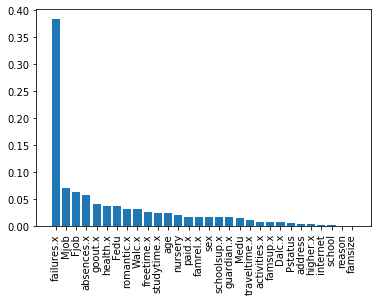

In [36]:
imp_dict={}
dtc.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= dtc.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_x_G1.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       166
           1       0.59      0.76      0.67        55

    accuracy                           0.81       221
   macro avg       0.75      0.79      0.77       221
weighted avg       0.83      0.81      0.82       221

Kappa Score: 0.536733879017768
	
Feature failures.x and its importance is 0.2800278021916689
Feature schoolsup.x and its importance is 0.19555760469676134
Feature absences.x and its importance is 0.052830003319613385
Feature goout.x and its importance is 0.043841411704300684
Feature Medu and its importance is 0.03964460314147414
Feature age and its importance is 0.03489904336681317
Feature reason and its importance is 0.033214712824395726
Feature romantic.x and its importance is 0.027417022287573624
Feature famrel.x and its importance is 0.027308282809261106
Feature Dalc.x and its importance is 0.025612921773329096
Feature studytime.x and its importance is 0.023457

([<matplotlib.axis.XTick at 0x7fd791f63790>,
 <a list of 30 Text xticklabel objects>)

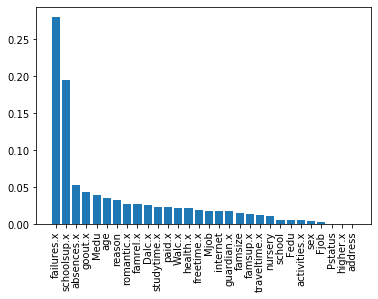

In [37]:
imp_dict={}
dtc.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= dtc.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_x_G3.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       157
           1       0.33      0.30      0.31        64

    accuracy                           0.62       221
   macro avg       0.53      0.52      0.52       221
weighted avg       0.61      0.62      0.61       221

Kappa Score: 0.04985157129695983
	
Feature age and its importance is 0.09779797930401218
Feature absences.y and its importance is 0.07364300581821628
Feature famrel.y and its importance is 0.07010948274066729
Feature health.y and its importance is 0.05870898476558121
Feature Fedu and its importance is 0.0583797684200303
Feature Medu and its importance is 0.058005166707284575
Feature reason and its importance is 0.05247233841955614
Feature studytime.y and its importance is 0.049766715938753925
Feature failures.y and its importance is 0.04920026733347319
Feature Mjob and its importance is 0.04245574702569704
Feature goout.y and its importance is 0.03692210209990586
F

([<matplotlib.axis.XTick at 0x7fd7920af750>,
 <a list of 30 Text xticklabel objects>)

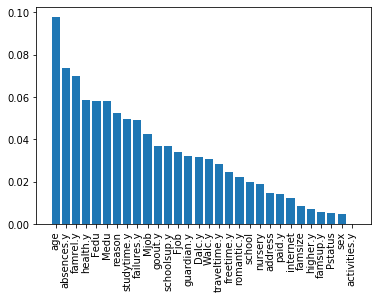

In [38]:
imp_dict={}
dtc.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = dtc.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_y_G1.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.68      0.71      0.70       143
           1       0.42      0.38      0.40        78

    accuracy                           0.60       221
   macro avg       0.55      0.55      0.55       221
weighted avg       0.59      0.60      0.59       221

Kappa Score: 0.09994051160023787
	
Feature freetime.y and its importance is 0.0883405914062042
Feature goout.y and its importance is 0.08669292709070524
Feature famrel.y and its importance is 0.07528592695842166
Feature age and its importance is 0.06655999231624324
Feature romantic.y and its importance is 0.04988831643287165
Feature absences.y and its importance is 0.04628198039396578
Feature Fjob and its importance is 0.04597429814086422
Feature Medu and its importance is 0.04333320013748832
Feature Walc.y and its importance is 0.041267451976306074
Feature address and its importance is 0.037705087734622514
Feature Mjob and its importance is 0.037631285207123055
Fe

([<matplotlib.axis.XTick at 0x7fd79226e0d0>,
 <a list of 30 Text xticklabel objects>)

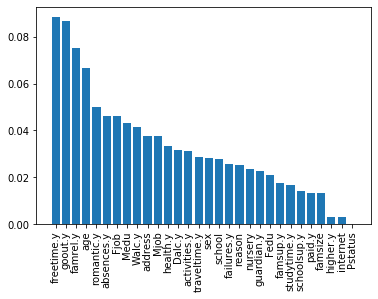

In [39]:
imp_dict={}
dtc.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = dtc.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))
print("\t")
for importance, name in sorted(zip(dtc.feature_importances_, X_train_y_G3.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

### Random Forest Classifier

In [40]:
rf = RandomForestClassifier()

              precision    recall  f1-score   support

           0       0.99      0.87      0.93       187
           1       0.57      0.97      0.72        34

    accuracy                           0.88       221
   macro avg       0.78      0.92      0.82       221
weighted avg       0.93      0.88      0.89       221

Kappa Score: 0.6493775933609959
	
Feature failures.x and its importance is 0.27925443516203696
Feature absences.x and its importance is 0.05661004697896576
Feature Fedu and its importance is 0.03976325545827741
Feature Fjob and its importance is 0.038691186285450416
Feature Walc.x and its importance is 0.03778877388334139
Feature age and its importance is 0.03723277713875338
Feature Mjob and its importance is 0.036376219831759024
Feature Medu and its importance is 0.035128872954397275
Feature goout.x and its importance is 0.03396386824434403
Feature health.x and its importance is 0.03341290166831001
Feature freetime.x and its importance is 0.033139868188554716
Feat

([<matplotlib.axis.XTick at 0x7fd79242d350>,
 <a list of 30 Text xticklabel objects>)

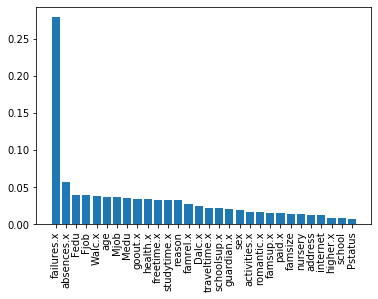

In [41]:
imp_dict={}
rf.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= rf.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_x_G1.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.97      0.85      0.91       170
           1       0.65      0.90      0.75        51

    accuracy                           0.86       221
   macro avg       0.81      0.88      0.83       221
weighted avg       0.89      0.86      0.87       221

Kappa Score: 0.6637931034482758
	
Feature failures.x and its importance is 0.22880396588711946
Feature schoolsup.x and its importance is 0.12002910259218931
Feature absences.x and its importance is 0.0645287332331319
Feature Mjob and its importance is 0.037573493086455155
Feature goout.x and its importance is 0.03652025115788442
Feature age and its importance is 0.03598443827069213
Feature Walc.x and its importance is 0.03457291964351695
Feature freetime.x and its importance is 0.034316886694587864
Feature Fedu and its importance is 0.031896908244142895
Feature health.x and its importance is 0.03138030935219049
Feature Medu and its importance is 0.0303562582378594


([<matplotlib.axis.XTick at 0x7fd79271c050>,
 <a list of 30 Text xticklabel objects>)

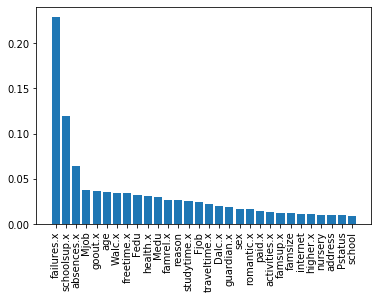

In [42]:
imp_dict={}
rf.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= rf.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_x_G3.columns),reverse=True):
    imp_dict[name] = importance
    print('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.96      0.74      0.84       213
           1       0.03      0.25      0.06         8

    accuracy                           0.72       221
   macro avg       0.50      0.49      0.45       221
weighted avg       0.93      0.72      0.81       221

Kappa Score: -0.0032215551325229796
	
Feature absences.y and its importance is 0.07304463456478044
Feature Fedu and its importance is 0.060990389223427574
Feature Mjob and its importance is 0.054925883185616954
Feature age and its importance is 0.054867121319989116
Feature freetime.y and its importance is 0.05120252272686219
Feature Medu and its importance is 0.04949200486852388
Feature Walc.y and its importance is 0.04887302335014057
Feature goout.y and its importance is 0.04847730273551648
Feature health.y and its importance is 0.04631734362593659
Feature reason and its importance is 0.04322317126397779
Feature studytime.y and its importance is 0.0391191884915099

([<matplotlib.axis.XTick at 0x7fd7928ad7d0>,
 <a list of 30 Text xticklabel objects>)

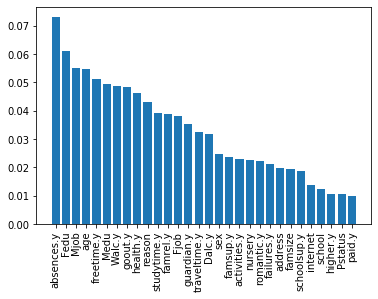

In [43]:
imp_dict={}
rf.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = rf.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_y_G1.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

              precision    recall  f1-score   support

           0       0.95      0.69      0.80       208
           1       0.08      0.46      0.14        13

    accuracy                           0.67       221
   macro avg       0.52      0.57      0.47       221
weighted avg       0.90      0.67      0.76       221

Kappa Score: 0.04821150855365486
	
Feature absences.y and its importance is 0.07450580091258872
Feature age and its importance is 0.05667417680339664
Feature Mjob and its importance is 0.05474755511229221
Feature health.y and its importance is 0.0529079284314695
Feature Fedu and its importance is 0.051679800447405784
Feature freetime.y and its importance is 0.05091867028662165
Feature Walc.y and its importance is 0.05037439545069488
Feature goout.y and its importance is 0.04930191622532977
Feature Medu and its importance is 0.04899900472968653
Feature studytime.y and its importance is 0.04472724709245437
Feature famrel.y and its importance is 0.044457339890421325
F

([<matplotlib.axis.XTick at 0x7fd7929c0550>,
 <a list of 30 Text xticklabel objects>)

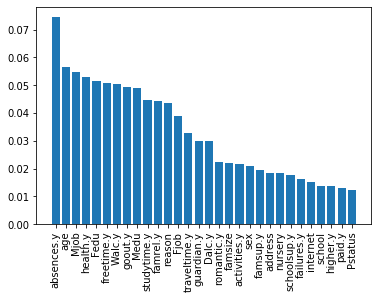

In [44]:
imp_dict={}
rf.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = rf.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))
print("\t")
for importance, name in sorted(zip(rf.feature_importances_, X_train_y_G3.columns),reverse=True):
    imp_dict[name] = importance
    print ('Feature '+name+ ' and its importance is '+str(importance))
plt.bar(range(len(imp_dict)), list(imp_dict.values()), align='center')
plt.xticks(range(len(imp_dict)), list(imp_dict.keys()),rotation=90)

### Linear SVM

In [45]:
lsvm = LinearSVC(max_iter=1000000)

In [46]:
lsvm.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= lsvm.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92       191
           1       0.50      0.97      0.66        30

    accuracy                           0.86       221
   macro avg       0.75      0.91      0.79       221
weighted avg       0.93      0.86      0.88       221

Kappa Score: 0.5847945891783567


In [47]:
lsvm.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= lsvm.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       178
           1       0.55      0.91      0.68        43

    accuracy                           0.84       221
   macro avg       0.76      0.86      0.79       221
weighted avg       0.89      0.84      0.85       221

Kappa Score: 0.5831936295054485


In [48]:
lsvm.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = lsvm.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.99      0.74      0.85       218
           1       0.03      0.67      0.07         3

    accuracy                           0.74       221
   macro avg       0.51      0.70      0.46       221
weighted avg       0.98      0.74      0.84       221

Kappa Score: 0.040813218609609514


In [49]:
lsvm.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = lsvm.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.95      0.69      0.80       207
           1       0.10      0.50      0.16        14

    accuracy                           0.68       221
   macro avg       0.53      0.60      0.48       221
weighted avg       0.90      0.68      0.76       221

Kappa Score: 0.06584509138536632


### Logistic Regression

In [50]:
lg = LogisticRegression(random_state=0,max_iter=1000000)

In [51]:
lg.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= lg.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       191
           1       0.48      0.93      0.64        30

    accuracy                           0.86       221
   macro avg       0.74      0.89      0.77       221
weighted avg       0.92      0.86      0.87       221

Kappa Score: 0.5571142284569138


In [52]:
lg.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= lg.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89       179
           1       0.54      0.90      0.67        42

    accuracy                           0.83       221
   macro avg       0.75      0.86      0.78       221
weighted avg       0.89      0.83      0.85       221

Kappa Score: 0.5698353411541901


In [53]:
lg.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = lg.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.98      0.74      0.85       215
           1       0.05      0.50      0.09         6

    accuracy                           0.74       221
   macro avg       0.52      0.62      0.47       221
weighted avg       0.96      0.74      0.83       221

Kappa Score: 0.0468471148126115


In [54]:
lg.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = lg.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.96      0.69      0.80       209
           1       0.08      0.50      0.14        12

    accuracy                           0.68       221
   macro avg       0.52      0.59      0.47       221
weighted avg       0.91      0.68      0.77       221

Kappa Score: 0.05697457779914661


### Gradient Boosting

In [55]:
gb = GradientBoostingClassifier(random_state=0)

In [56]:
gb.fit(X_train_x_G1,y_train_x_G1)
y_pred_x_G1= gb.predict(X_test_x_G1)
print(classification_report(y_pred_x_G1,y_test_x_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G1,y_test_x_G1)))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       185
           1       0.57      0.92      0.70        36

    accuracy                           0.87       221
   macro avg       0.78      0.89      0.81       221
weighted avg       0.91      0.87      0.88       221

Kappa Score: 0.6271839980720568


In [57]:
gb.fit(X_train_x_G3,y_train_x_G3)
y_pred_x_G3= gb.predict(X_test_x_G3)
print(classification_report(y_pred_x_G3,y_test_x_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_x_G3,y_test_x_G3)))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90       174
           1       0.59      0.89      0.71        47

    accuracy                           0.85       221
   macro avg       0.78      0.86      0.80       221
weighted avg       0.89      0.85      0.86       221

Kappa Score: 0.6127602556173986


In [58]:
gb.fit(X_train_y_G1,y_train_y_G1)
y_pred_y_G1 = gb.predict(X_test_y_G1)
print(classification_report(y_pred_y_G1,y_test_y_G1))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G1,y_test_y_G1)))

              precision    recall  f1-score   support

           0       0.94      0.75      0.83       204
           1       0.12      0.41      0.19        17

    accuracy                           0.72       221
   macro avg       0.53      0.58      0.51       221
weighted avg       0.88      0.72      0.78       221

Kappa Score: 0.07683352735739235


In [59]:
gb.fit(X_train_y_G3,y_train_y_G3)
y_pred_y_G3 = gb.predict(X_test_y_G3)
print(classification_report(y_pred_y_G3,y_test_y_G3))
print("Kappa Score: " +str(cohen_kappa_score(y_pred_y_G3,y_test_y_G3)))

              precision    recall  f1-score   support

           0       0.92      0.70      0.80       197
           1       0.17      0.50      0.25        24

    accuracy                           0.68       221
   macro avg       0.54      0.60      0.52       221
weighted avg       0.84      0.68      0.74       221

Kappa Score: 0.10780690282595096
